## 1. Business Understanding

#### 1.1 Business Overview
Customer churn is the process where clients discontinue their relationship with a company or brand. In the telecom sector, this occurs when subscribers cancel their services with one provider and either switch to a competitor or stop using the service entirely.

A [2024 study by Alisha Sikri and colleagues](https://www.nature.com/articles/s41598-024-63750-0), published in Scientific Reports, delves into the challenges of customer churn in the telecom industry. The research emphasizes the significance of retaining existing customers over acquiring new ones. By leveraging machine learning algorithms, this project aims to predict potential churners, allowing telecom companies to implement effective retention strategies.

#### 1.2 Business Problem
SyriaTel faces the issue of customer churn, where subscribers cancel their services or switch to competitors. High churn rates can result in significant revenue loss, increased costs to attract new customers, and reduced market share. The company needs to understand which customers are at risk of leaving and identify patterns in their behavior to mitigate these losses effectively.

#### 1.3 Business Objectives

Main Objective

To build a machine learning model that accurately predicts whether a customer is likely to churn.

Specific Objectives

 - To analyze the impact of customer demographics (e.g., state, area code) on churn.

 - To examine the effect of account details (e.g., account length) on churn.

 - To assess how subscription plans (e.g., international and voicemail plans) influence churn.

 - To evaluate the role of usage patterns during day, evening, and night periods in predicting churn.

 - To investigate the relationship between international calling behavior and churn.

 - To explore how customer service call frequency relates to churn.

 - To Develop a predictive model to identify customers at risk of churning based on these factors.

Key Questions

1. How do customer demographics (e.g., state, area code) affect churn?

2. How do account details (e.g., account length) influence churn?

3. How do subscription plans (e.g., international and voicemail plans) impact churn?

4. How do usage patterns during day, evening, and night periods relate to churn?

5. What is the effect of international calling behavior on churn?

6. How does the frequency of customer service calls relate to churn?

7. Can a predictive model accurately identify customers at risk of churning based on these factors?

## 2 Data Understanding

The dataset is obtained from Kaggle, specifically from the dataset [Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

The dataset has 3333 records and 21 columns including numeric, categorical, and boolean variables.The target variable `churn`  indicates whether a customer has left the service (Yes) or remained (No).

Dataset Description:

`state` -	Customer’s state of residence (categorical)

`account length` -	Number of months the customer has been with SyriaTel (numeric)

`area code` -	Customer’s telephone area code (categorical/numeric)

`phone number` -	Customer’s phone number (identifier, usually not used for modeling)

`international plan` -	Whether the customer subscribes to an international calling plan (Yes/No)

`voice mail plan` - 	Whether the customer has a voicemail plan (Yes/No)

`number vmail messages` -	Number of voicemail messages the customer has

`total day minutes` - 	Total minutes of calls during the day

`total day calls` -	Total number of calls during the day

`total day charge`-	Total charges for day calls

`total eve minutes` -	Total minutes of evening calls

`total eve calls` -	Total number of evening calls

`total eve charge` -	Total charges for evening calls

`total night minutes` -	Total minutes of night calls

`total night calls` -	Total number of night calls

`total night charge` -	Total charges for night calls

`total intl minutes` -	Total minutes of international calls

`total intl calls` -	Total number of international calls

`total intl charge` -	Total charges for international calls

`customer service calls` -	Number of calls to customer service

`churn` -	Whether the customer has churned (Yes/No, target variable)

## 3.0 Data Exploration

#### 3.1 Load Dataset

In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load dataset 
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

#### 3.2 Dataset Overview

In [3]:
# Preview the first 5 rows of the dataset
data.head()



,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Summaryinformation about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# Checking dataset shape 
data.shape

(3333, 21)

In [6]:
# Check missing values
print(f"\n {'Number of null values in every column'} \n {data.isnull().sum()}")


 Number of null values in every column 
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [7]:
# Check for duplicate values
data.duplicated().sum()

0

In [8]:
# Describe the dataset
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## 3.0 Data Preparation
In this section, we will look into data cleaning techniques, Exploratory Data Analysis (EDA) and data preprocessing for our dataset.

#### 3.1 Data Cleaning

Handle Missing Values

In [9]:
# Check for missing values in  dataset

print(data.isnull().sum())


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


Check for and Handle Duplicate Rows

In [10]:
# Check for  duplicate rows
duplicates = data.duplicated().sum()
duplicates

0

No duplicates for the data.

Next step is to Standardize Column Names

This step makes column names consistent and easier to work with like `total day minutes` becomes `total_day_minutes`.

In [11]:
# Dataset columns before standardizing
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [12]:
# Columns standardization
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Dataset columns after standardizing
data.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

Next is data conversion 

In [13]:
# Data types conversion
data.dtypes

state                      object
account_length              int64
area_code                   int64
phone_number               object
international_plan         object
voice_mail_plan            object
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                        bool
dtype: object

In [14]:
# Convert object data types to category data types
data["state"] = data["state"].astype("category")
data["international_plan"] = data["international_plan"].astype("category")
data["voice_mail_plan"] = data["voice_mail_plan"].astype("category")
data["churn"] = data["churn"].astype("category")
data['area_code'] = data['area_code'].astype('object')
data.dtypes

state                     category
account_length               int64
area_code                   object
phone_number                object
international_plan        category
voice_mail_plan           category
number_vmail_messages        int64
total_day_minutes          float64
total_day_calls              int64
total_day_charge           float64
total_eve_minutes          float64
total_eve_calls              int64
total_eve_charge           float64
total_night_minutes        float64
total_night_calls            int64
total_night_charge         float64
total_intl_minutes         float64
total_intl_calls             int64
total_intl_charge          float64
customer_service_calls       int64
churn                     category
dtype: object

Since `phone_number` is a unique identifier we will drop it.


In [15]:
# Drop the phone_number column
data = data.drop(columns = ["phone_number"])


### 3.2 EDA
This step involves investigating a dataset to understand its main characteristics and uncover patterns.

#### 3.2.1 Univariate analysis
Univariate analysis examines each variable individually to understand its distribution, central tendency, and variability.

In [16]:
# Distribution of categorical features
categorical_features = data.select_dtypes(include = ["category", "object"]).columns
categorical_features

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


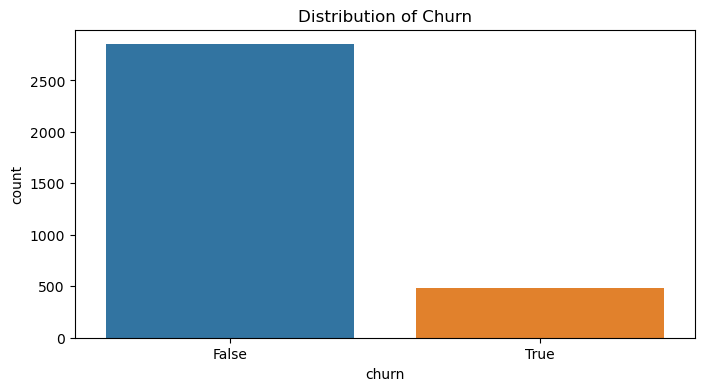

In [17]:
# Distribution of target variable

data["churn"].value_counts()

# Percentage of target variable
churn_percentage = data["churn"].value_counts(normalize = True) * 100
print(churn_percentage)

# Visualize the target variable distribution
plt.figure(figsize = (8, 4))
sns.countplot(x = "churn", data = data)
plt.title("Distribution of Churn")
plt.show()


85.5% of customers did not churn, while 14.5% of customers left the company. This shows that the majority of customers are retained, but the minority who churn are strategically important for the business. The dataset is therefore imbalanced.

international_plan
no     3010
yes     323
Name: count, dtype: int64
international_plan
no     90.309031
yes     9.690969
Name: proportion, dtype: float64


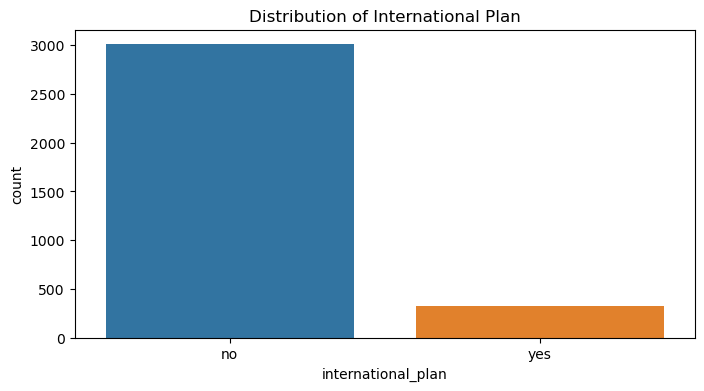

In [18]:
# Distribution of international_plan
int_plan = data["international_plan"].value_counts() 
print(int_plan)

int_percentage = data["international_plan"].value_counts(normalize = True) * 100
print(int_percentage)

# Visualize
plt.figure(figsize = (8,4))
sns.countplot(x = "international_plan", data = data)
plt.title("Distribution of International Plan")
plt.show()


About 3010 customers  are not subscribed to an international plan.

Only 323 have the plan.

voice_mail_plan
no     2411
yes     922
Name: count, dtype: int64
voice_mail_plan
no     72.337234
yes    27.662766
Name: proportion, dtype: float64


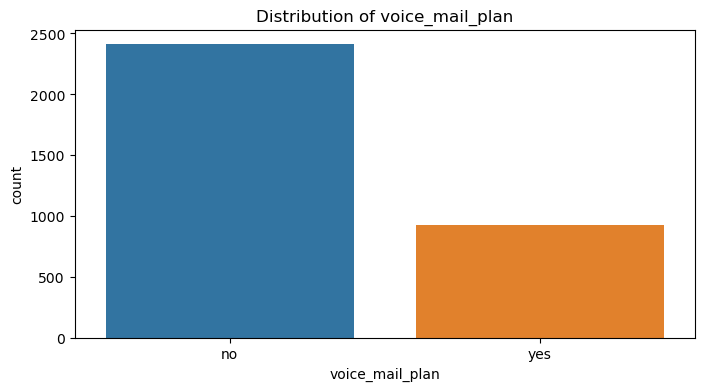

In [19]:
# Distribution of voice_mail_plan
voicemail_plan = data["voice_mail_plan"].value_counts() 
print(voicemail_plan)

voicemail_percentage = data["voice_mail_plan"].value_counts(normalize = True) * 100
print(voicemail_percentage)

# Visualize
plt.figure(figsize = (8,4))
sns.countplot(x = "voice_mail_plan", data = data)
plt.title("Distribution of voice_mail_plan")
plt.show()

About 72% of customers do not use this service. Approximately 28% have a voice mail plan, so usage is moderate compared to the international plan

area_code
415    1655
510     840
408     838
Name: count, dtype: int64
area_code
415    49.654965
510    25.202520
408    25.142514
Name: proportion, dtype: float64


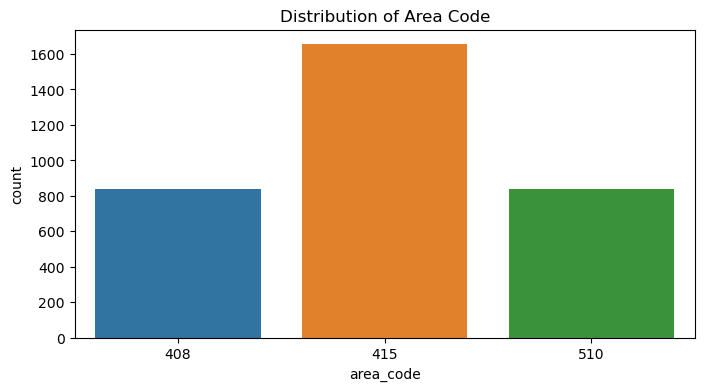

In [20]:
# Distribution of area_code
area_code = data["area_code"].value_counts() 
print(area_code)

area_code_percentage = data["area_code"].value_counts(normalize = True) * 100
print(area_code_percentage)

# Visualize
plt.figure(figsize = (8,4))
sns.countplot(x = "area_code", data = data)
plt.title("Distribution of Area Code")
plt.show()

Almost half of the customers are in the 415 area code. The remaining customers are roughly evenly split between 510 and 408.

state
WV    106
MN     84
NY     83
AL     80
OR     78
Name: count, dtype: int64


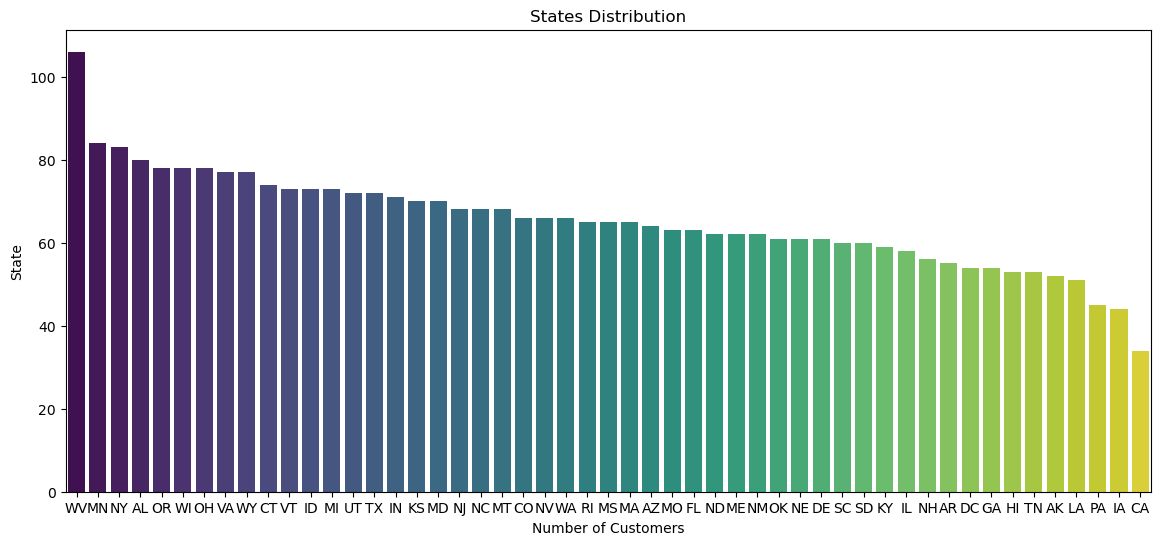

In [21]:
# Getstates by count
states = data['state'].value_counts()
print(states.head())

plt.figure(figsize=(14,6))
sns.barplot(x = states.index, y = states.values, palette='viridis',order = states.index)

plt.title("States Distribution")
plt.xlabel("Number of Customers")
plt.ylabel("State")
plt.show()

WV has the highest number of customers among the top five, with 106, making up the largest share in this group.MN, NY, AL, and OR follow closely, ranging from 78 to 84 customers.

#### 3.2.2 Bivariate Analysis
Bivariate analysis examines the relationship between two variables to see how one may affect or relate to the other. In your case, the main focus will be how other variables relate to churn.

Text(0, 0.5, 'Number of Customers')

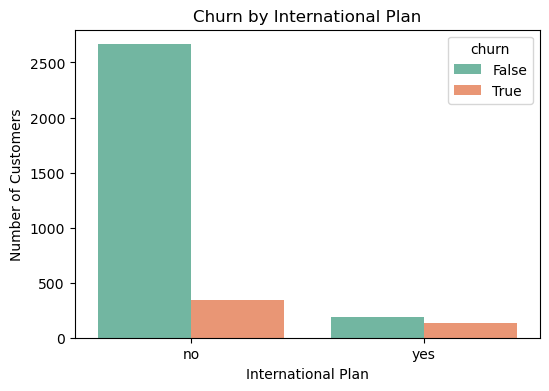

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='international_plan', hue = data['churn'].astype(str), data=data, palette='Set2')
plt.title("Churn by International Plan")
plt.xlabel("International Plan")
plt.ylabel("Number of Customers")

The majority of customers do not have an international plan. Customers with an international plan are a smaller group.

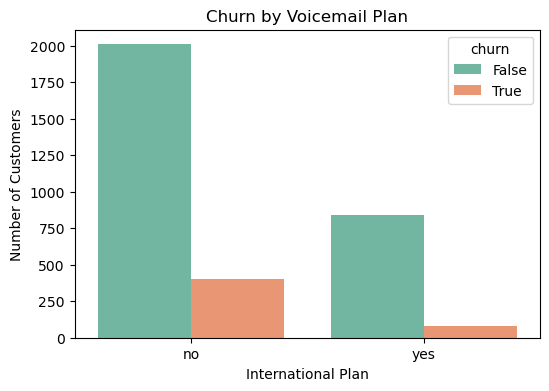

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='voice_mail_plan', hue = data['churn'].astype(str), data=data, palette='Set2')
plt.title("Churn by Voicemail Plan")
plt.xlabel("International Plan")
plt.ylabel("Number of Customers")
plt.show();

Those with an international plan, the customers who churn is noticeably higher compared to those without the plan.
This suggests that having an international plan may be associated with a higher likelihood of churn.

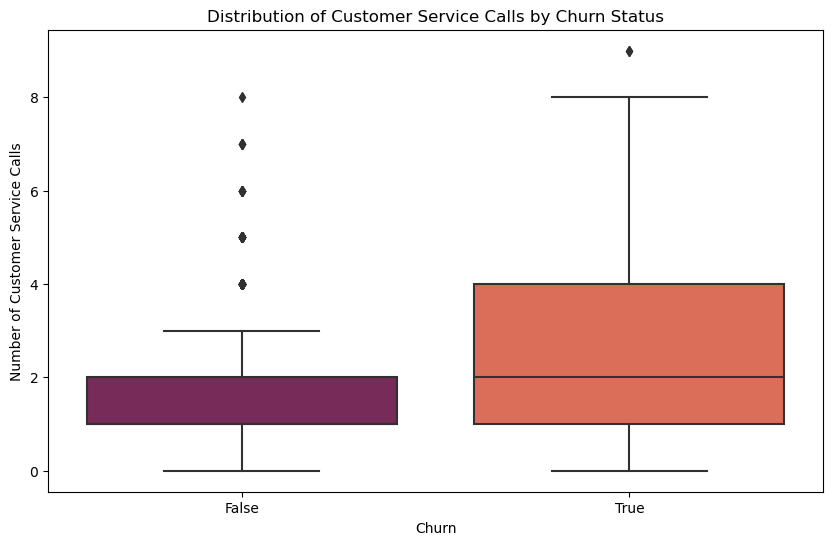

In [24]:
# Bivariate analysis: Customer service calls vs Churn

plt.figure(figsize = (10, 6))
sns.boxplot(data=data, x='churn', y='customer_service_calls', palette='rocket')
plt.title('Distribution of Customer Service Calls by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Number of Customer Service Calls')

plt.show()

Customers who churn tend to have made more customer service calls compared to those who stay.

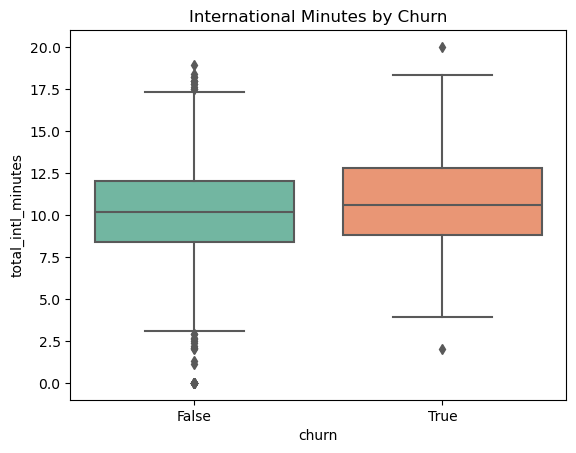

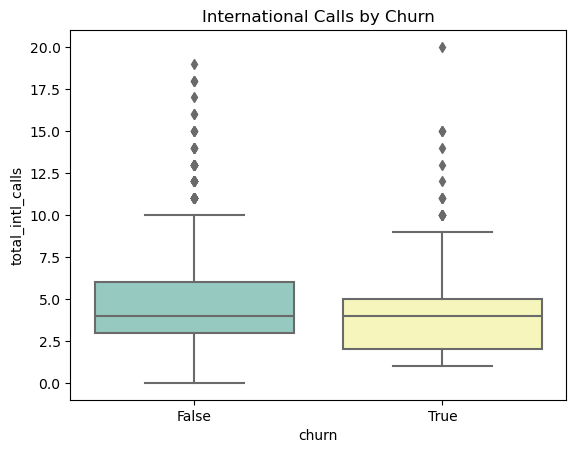

In [25]:
sns.boxplot(x='churn', y='total_intl_minutes', data=data, palette='Set2')
plt.title("International Minutes by Churn")
plt.show()

sns.boxplot(x='churn', y='total_intl_calls', data=data, palette='Set3')
plt.title("International Calls by Churn")
plt.show()


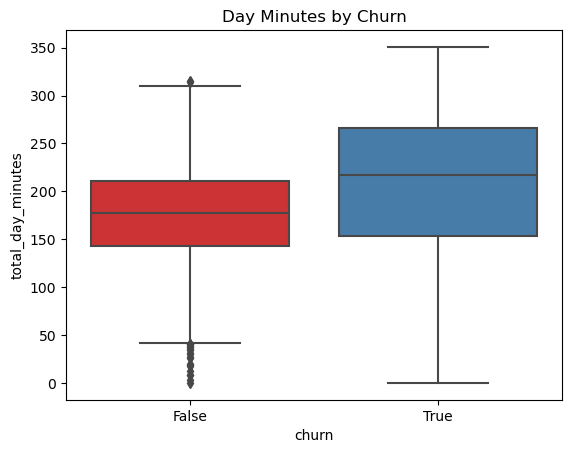

In [26]:
sns.boxplot(x='churn', y='total_day_minutes', data=data, palette='Set1')
plt.title("Day Minutes by Churn")
plt.show()

Customers who churn generally have higher total day minutes compared to those who stay.


#### 3.3 Multivariate analysis

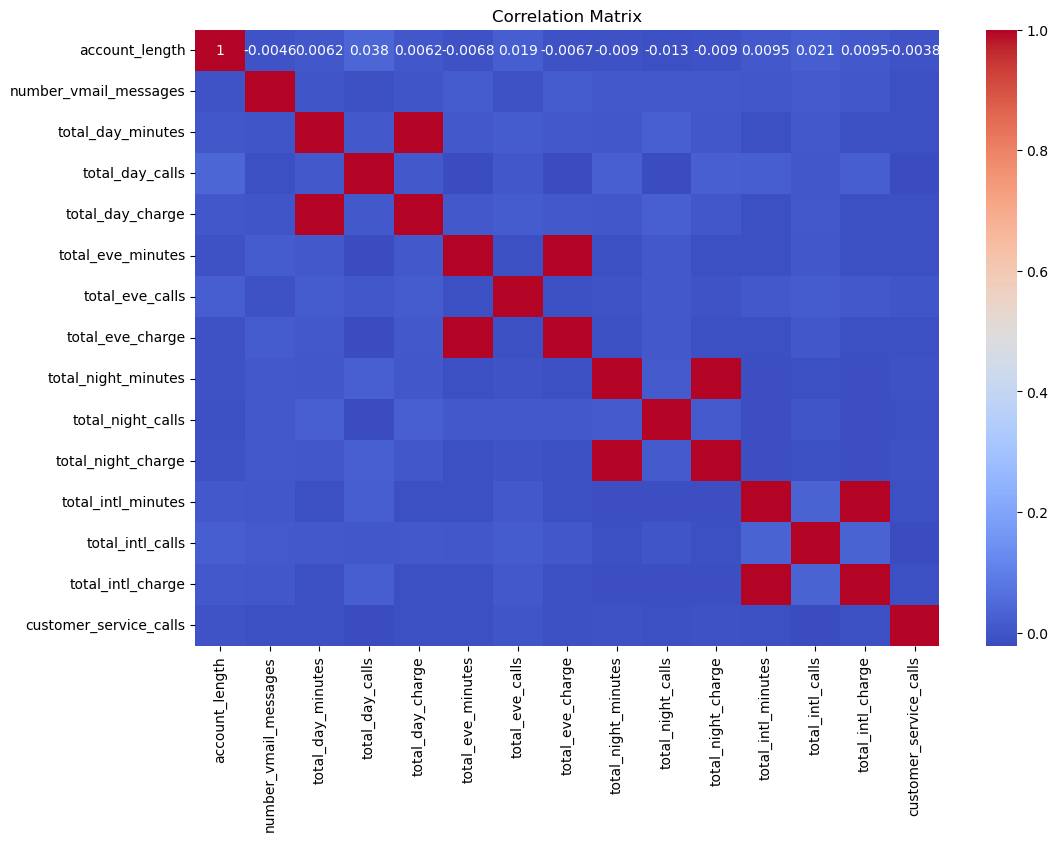

In [27]:
# Correlation matrix
corr = data.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

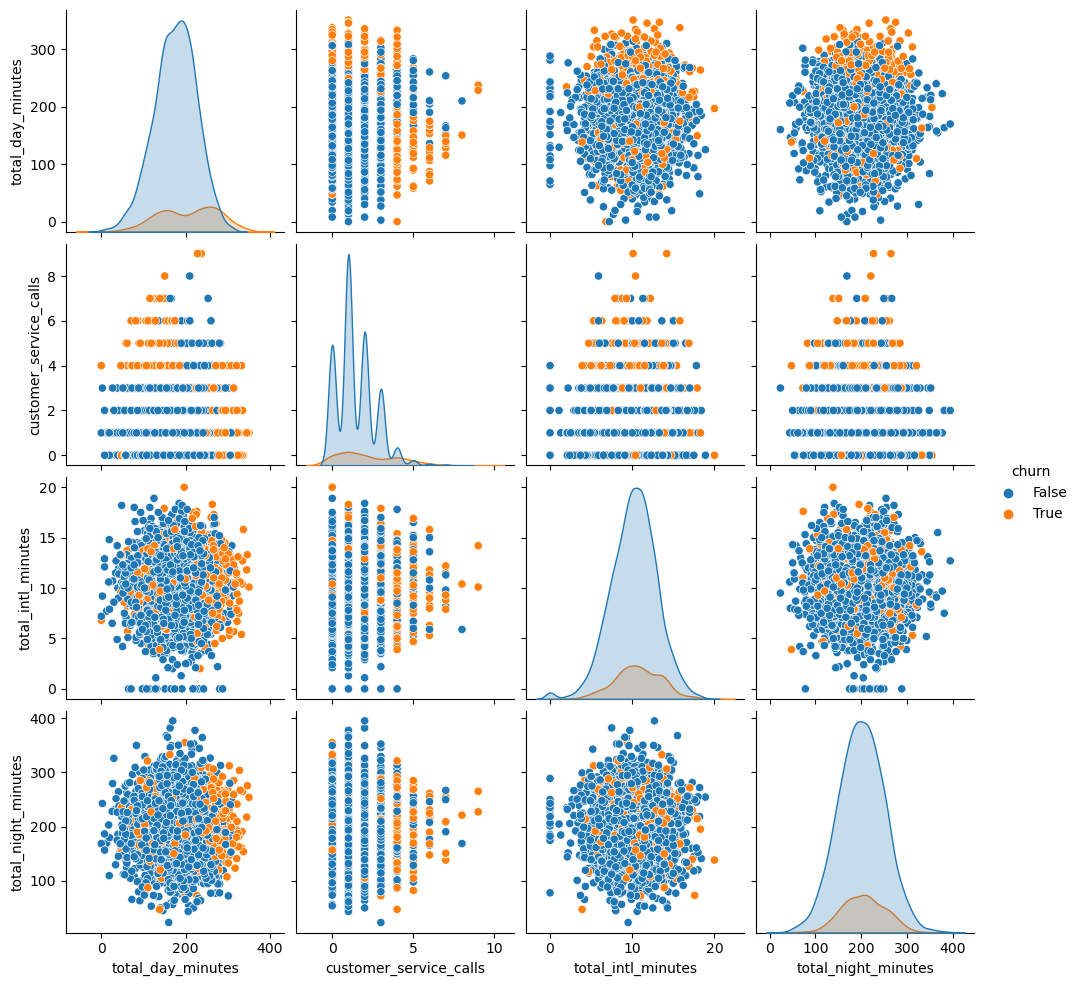

In [28]:

# Select relevant columns for pairplot
features = ['total_day_minutes', 'customer_service_calls', 'total_intl_minutes', 'total_night_minutes', 'churn']
sns.pairplot(data[features], hue='churn', diag_kind='kde')
plt.show()

### 3.3 Data Pre-processing

1.	Feature Engineering:

Create new features that may help prediction (e.g., total charges, usage ratios, flags for high service calls).

Transform categorical variables (e.g., one-hot encoding for 'state', 'area_code', 'international_plan', etc.).


In [30]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical features to encode:", categorical_features)

Categorical features to encode: ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


In [31]:
# One-hot encode categorical features
data_encoded = pd.get_dummies(data, columns = categorical_features,drop_first = True)
data_encoded.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510,international_plan_yes,voice_mail_plan_yes,churn_True
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,False,False,False,False,False,True,False,False,True,False
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,False,False,False,False,False,True,False,False,True,False
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,False,False,False,False,False,True,False,False,False,False
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,False,False,False,False,False,False,False,True,False,False
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,False,False,False,False,False,True,False,True,False,False


In [32]:
print(f"Final dataset shape: {data_encoded.shape}")

Final dataset shape: (3333, 70)


In [33]:
# Ensure all boolean columns are converted to integers
for col in data_encoded.select_dtypes(include='bool').columns:
    data_encoded[col] = data_encoded[col].astype(int)

# If you want all columns to be int, you can also do:
data_encoded = data_encoded.astype(int)

data_encoded.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510,international_plan_yes,voice_mail_plan_yes,churn_True
0,128,25,265,110,45,197,99,16,244,91,...,0,0,0,0,0,1,0,0,1,0
1,107,26,161,123,27,195,103,16,254,103,...,0,0,0,0,0,1,0,0,1,0
2,137,0,243,114,41,121,110,10,162,104,...,0,0,0,0,0,1,0,0,0,0
3,84,0,299,71,50,61,88,5,196,89,...,0,0,0,0,0,0,0,1,0,0
4,75,0,166,113,28,148,122,12,186,121,...,0,0,0,0,0,1,0,1,0,0
